In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://drive.google.com/uc?id={}'.format('1jXTMK2K4L-vedrXbvhKzOUSjGXPbn9uB')
data = pd.read_csv(url)

# Find categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

<ipython-input-2-e9cacdd1385b>:3: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


In [3]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode categorical columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [4]:
# Replace empty values in categorical columns with the most common value
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    most_common_value = data[column].mode()[0]
    data[column].fillna(most_common_value, inplace=True)

# Replace empty values in numerical columns with the mean
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [5]:
# Split the data into input features (X) and target variable (y)
X = data.drop('X_HLTHPLN', axis=1)
y = data['X_HLTHPLN']

# Apply SMOTE to balance the classes
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply RandomUnderSampler to balance classes
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)

# Apply ADASYN to balance the classes
#adasyn = ADASYN(random_state=42)
#X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize XGBoost classifier with logloss as the evaluation metric
model = xgb.XGBClassifier()

# Fit the model
model.fit(X_train, y_train,)

# Predictions
y_pred = model.predict(X_test)

# Calculate and print the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))

Accuracy on test set: 0.7791


In [7]:
# Calculate and print the accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: {:.4f}'.format(accuracy))

Accuracy on test set: 0.7791


In [8]:
# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)

# Print the classification metrics
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4468
           1       0.78      0.76      0.77      4336

    accuracy                           0.78      8804
   macro avg       0.78      0.78      0.78      8804
weighted avg       0.78      0.78      0.78      8804



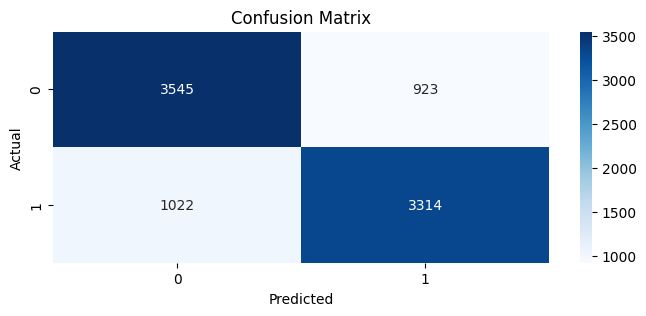

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a nice confusion matrix plot
plt.figure(figsize=(8, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top most important variables and their scores
top_n = 10  # Change this to the desired number of top features
print("Top {} most important features:".format(top_n))
print(importance_df.head(top_n))

Top 10 most important features:
      Feature  Importance
25    QSTLANG    0.192429
8    RENTHOM1    0.149765
7       EDUCA    0.073221
10    EMPLOY1    0.069643
27  X_IMPRACE    0.065029
18  X_SMOKER3    0.050263
13   PREGNANT    0.043132
1      SEXVAR    0.035798
26  X_URBSTAT    0.031411
9    VETERAN3    0.030663


In [13]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate True Positive Rate (TPR), True Negative Rate (TNR), False Positive Rate (FPR), and False Negative Rate (FNR)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print the results
print("True Positive Rate (TPR):", TPR * 100, "%")
print("True Negative Rate (TNR):", TNR * 100, "%")
print("False Positive Rate (FPR):", FPR * 100, "%")
print("False Negative Rate (FNR):", FNR * 100, "%")

True Positive Rate (TPR): 76.42988929889299 %
True Negative Rate (TNR): 79.34198746642794 %
False Positive Rate (FPR): 20.65801253357207 %
False Negative Rate (FNR): 23.570110701107012 %
